In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("Mall_Customers.csv")

In [6]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
X = data.iloc[:, [3,4]].values

In [ ]:
X

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Number of wcss')

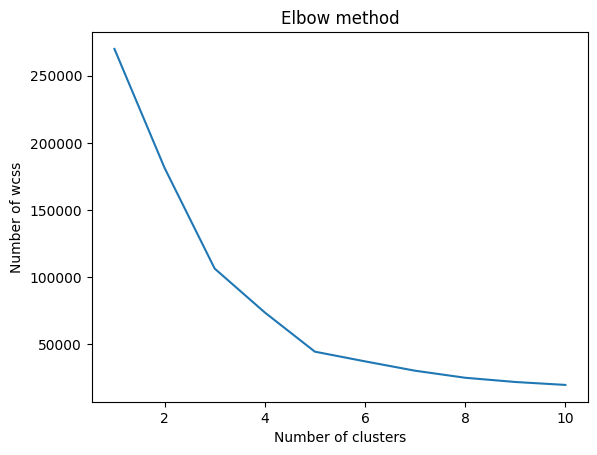

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmean = KMeans(n_clusters=i, init="k-means++", random_state=42)
  kmean.fit(X)
  wcss.append(kmean.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Number of wcss")

In [15]:
kmean = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_predict = kmean.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
y_predict

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

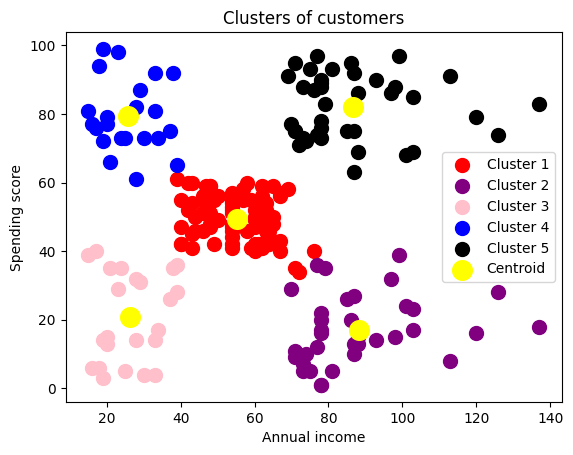

In [17]:
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s = 100, c = "red", label = "Cluster 1")
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s = 100, c = "purple", label = "Cluster 2")
plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], s = 100, c = "pink", label = "Cluster 3")
plt.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], s = 100, c = "blue", label = "Cluster 4")
plt.scatter(X[y_predict == 4, 0], X[y_predict == 4, 1], s = 100, c = "black", label = "Cluster 5")
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], s = 200, color = "yellow", label ="Centroid")
plt.title("Clusters of customers")
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.legend()